# PCA (Principal Component Analysis)

## PCA Class

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
'''import wget
wget.download('https://bit.ly/fruits_300_data', 'fruits_300.npy')''';

In [3]:
import numpy as np

fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100*100)

In [4]:
from sklearn.decomposition import PCA

pca = PCA(n_components=50)
pca.fit(fruits_2d)

PCA(n_components=50)

In [5]:
print(pca.components_.shape)

(50, 10000)


In [6]:
import matplotlib.pyplot as plt

def draw_fruits(arr, ratio=1):
    n = len(arr)    # n is the number of samples
    # Draw 10 images on each line. Calculates the total number of rows by dividing the number of samples by 10.
    rows = int(np.ceil(n/10))
    # If there is one row, the number of columns is the number of samples. Otherwise, it's 10.
    cols = n if rows < 2 else 10
    fig, axs = plt.subplots(rows, cols, 
                            figsize=(cols*ratio, rows*ratio), squeeze=False)
    for i in range(rows):
        for j in range(cols):
            if i*10 + j < n:    # Draw up to n.
                axs[i, j].imshow(arr[i*10 + j], cmap='gray_r')
            axs[i, j].axis('off')
    plt.show()

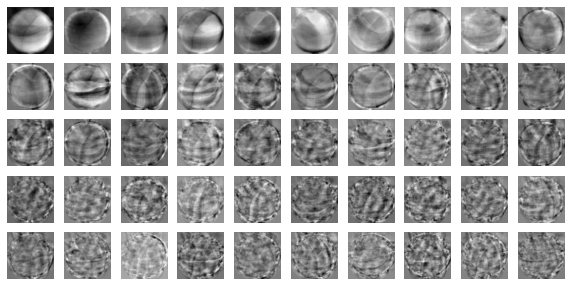

In [7]:
draw_fruits(pca.components_.reshape(-1, 100, 100))

In [8]:
print(fruits_2d.shape)

(300, 10000)


In [9]:
fruits_pca = pca.transform(fruits_2d)

In [10]:
print(fruits_pca.shape)

(300, 50)


## Reconstruct the Original Data

In [11]:
fruits_inverse = pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape)

(300, 10000)


In [12]:
fruits_reconstruct = fruits_inverse.reshape(-1, 100, 100)

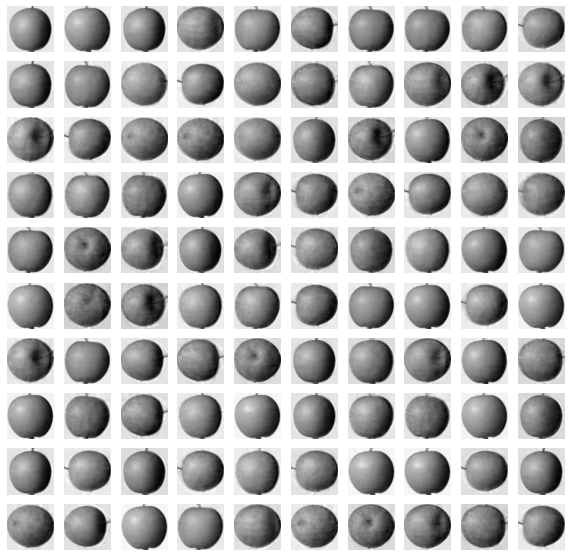

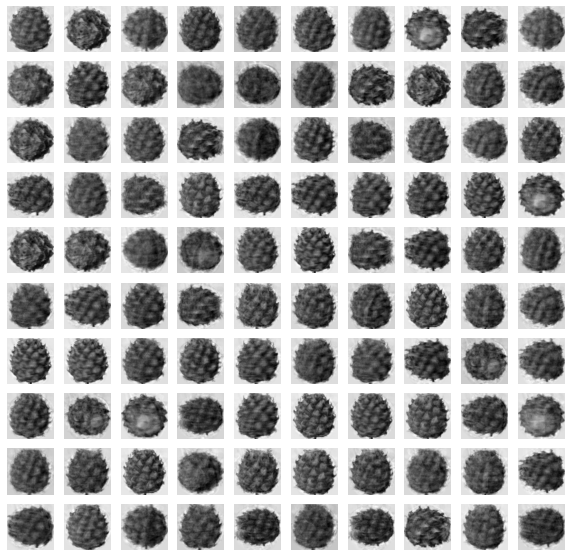

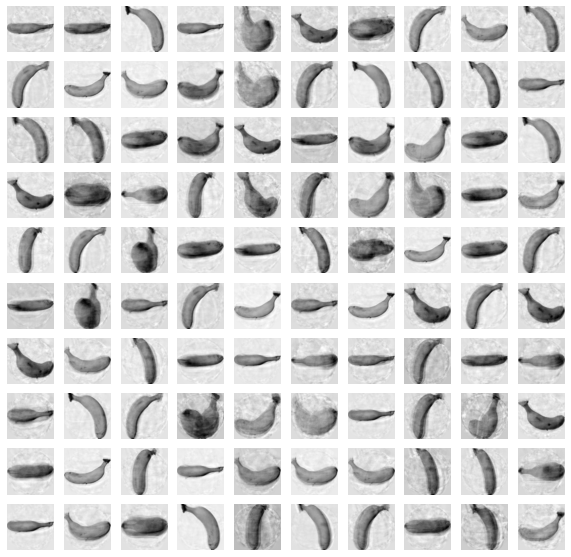

In [13]:
for start in [0, 100, 200]:
    draw_fruits(fruits_reconstruct[start:start+100])
    print("\n")

## Explained Variance

In [14]:
print(np.sum(pca.explained_variance_ratio_))

0.9214862196443581


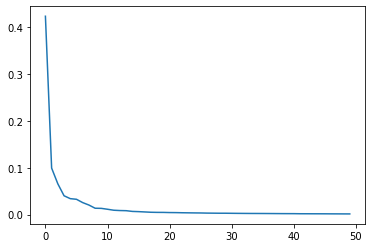

In [15]:
plt.plot(pca.explained_variance_ratio_)

## Using with Other Algorithm

In [16]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

In [17]:
target = np.array([0] * 100 + [1] * 100 + [2] * 100)

In [18]:
from sklearn.model_selection import cross_validate

scores = cross_validate(lr, fruits_2d, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9966666666666667
0.5295308113098145


In [19]:
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

1.0
0.03000669479370117


In [20]:
pca = PCA(n_components=0.5)
pca.fit(fruits_2d)

PCA(n_components=0.5)

In [21]:
print(pca.n_components_)

2


In [22]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 2)


In [23]:
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.99
0.0592132568359375


In [24]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_pca)

KMeans(n_clusters=3, random_state=42)

In [25]:
print(np.unique(km.labels_, return_counts=True))

(array([0, 1, 2]), array([110,  99,  91], dtype=int64))


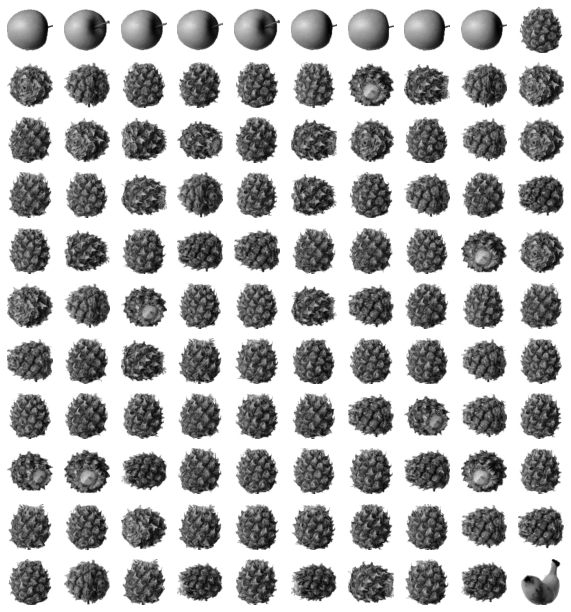

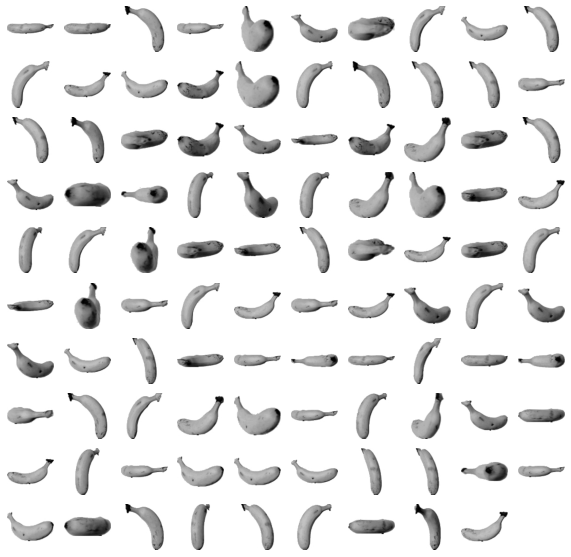

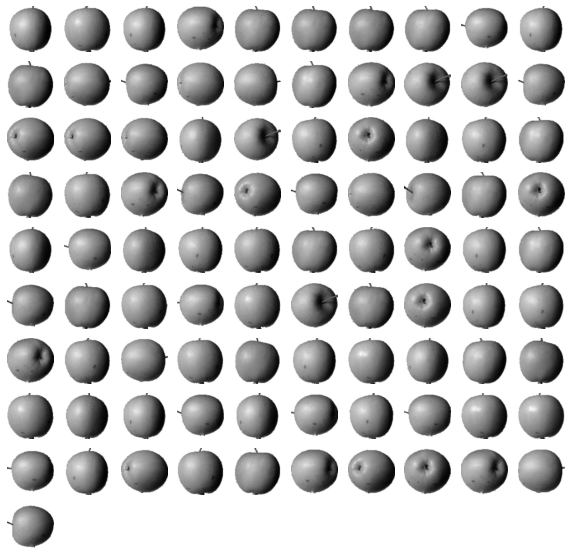

In [26]:
for label in range(0, 3):
    draw_fruits(fruits[km.labels_ == label])
    print("\n")

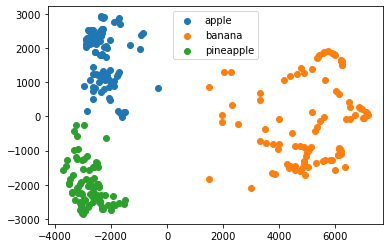

In [27]:
for label in range(0, 3):
    data = fruits_pca[km.labels_ == label]
    plt.scatter(data[:,0], data[:,1])
plt.legend(['apple', 'banana', 'pineapple'])
plt.show()